In [5]:
pip install -U multidimensional-wilcoxon-mann-whitney

In [6]:
from multidimensional_wilcoxon_mann_whitney import multidimensional_ranksum
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

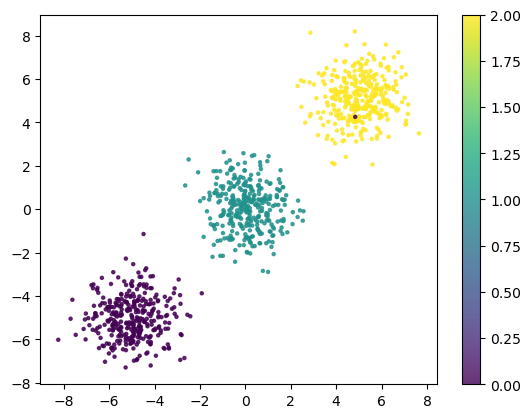

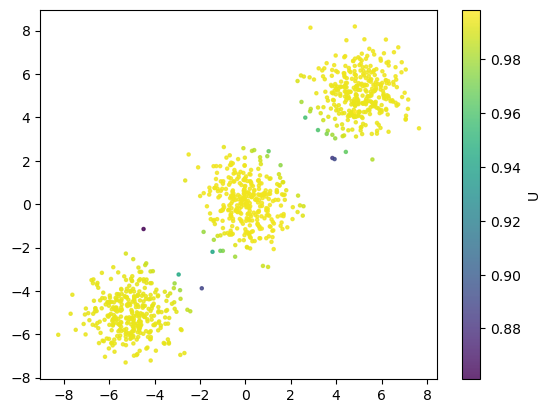

'AvgU 0.9932743100426723'

In [25]:
n_samples = 1000
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=42)
y[-1]=0
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, s=5)
plt.colorbar()
plt.show()

U =  multidimensional_ranksum(X,y)

plt.scatter(X[:, 0], X[:, 1], c=U, alpha=0.8, s=5)
plt.colorbar(label="U");
plt.show()
display(f"AvgU {np.mean(U)}");

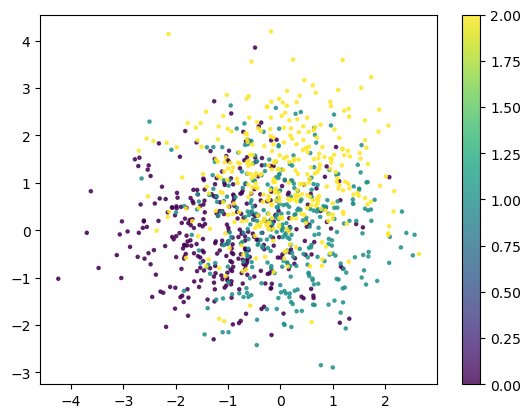

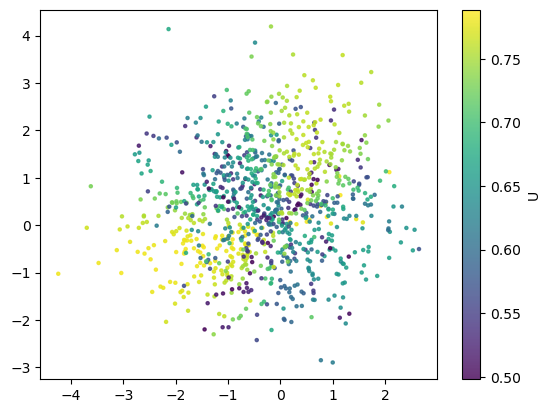

'AvgU 0.667076159817503'

In [26]:
n_samples = 1000
centers = [(-1,  0), (0, 0), (0, 1)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, s=5)
plt.colorbar()
plt.show()

U =  multidimensional_ranksum(X, y, "cosine")

plt.scatter(X[:, 0], X[:, 1], c=U, alpha=0.8, s=5)
plt.colorbar(label="U");

plt.show()
display(f"AvgU {np.mean(U)}")

In [49]:
import pandas as pd
n_samples = 1000
np.random.seed(42)
c1 = np.random.randn(100)
X, y = make_blobs(n_samples=n_samples, centers=[c1,c1], shuffle=False, random_state=42)
X = X - X.mean(0)
data = []
for d in np.linspace(0,15):
    X2 = X.copy()
    X2[y==1,0]+=d
    Ue = multidimensional_ranksum(X2,y, "euclidean")
    Uc = multidimensional_ranksum(X2,y, "cosine")
    data.append({"d":d, "AvgUe":np.mean(Ue), "StdUe": np.std(Ue), "AvgUc":np.mean(Uc), "StdUc": np.std(Uc)  } )
df = pd.DataFrame(data)

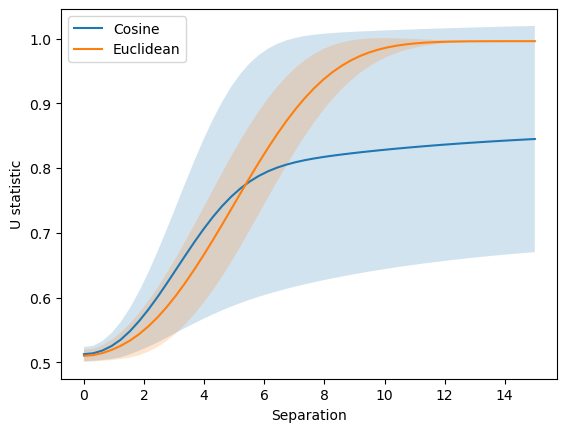

In [51]:
plt.fill_between(df["d"], df["AvgUc"]-df["StdUc"], df["AvgUc"]+df["StdUc"], alpha=0.2)
plt.plot(df["d"], df["AvgUc"], label="Cosine")
plt.fill_between(df["d"], df["AvgUe"]-df["StdUe"], df["AvgUe"]+df["StdUe"], alpha=0.2)
plt.plot(df["d"], df["AvgUe"], label="Euclidean")
plt.xlabel("Separation")
plt.ylabel("U statistic")
plt.legend();